<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

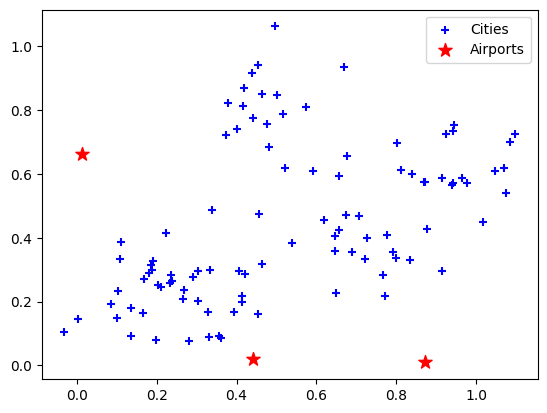

In [29]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

# gererating a set of 100 cities (cities' locations will not change)
for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

# generating initial random locations for 3 airports
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

# plotting the initial state
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [ ]:
# Objective as a function of epoch


In [ ]:
# An optimal state


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

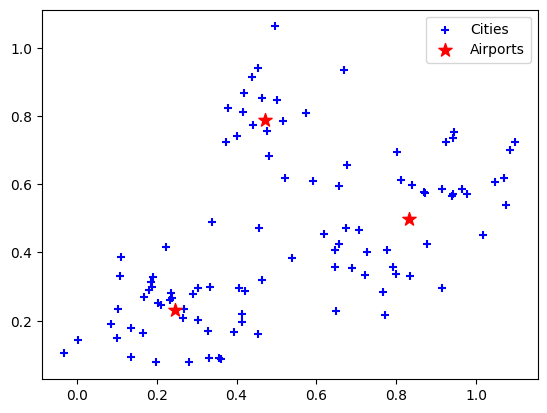

In [30]:
import math
#step size, a small positive constant
a = 0.005

#number of times to repeat the loop
iterations = 20

#sets for the cities closest to each airport
city_set_1 = set()
city_set_2 = set()
city_set_3 = set()


#Computes the objective function then appends the result to fs for plotting
#returns the objective function value
def objective_function(airport, city_set,fs):
  obj_fun = 0
  for city in city_set:
      obj_fun += (((airport[0] - city[0]) ** 2) + ((airport[1] - city[1]) ** 2))
  return obj_fun

#Gets the gradient values and multiplies it by 2 in order to move the airports closer
def gradient(airport, city_set):
  dx = 0
  dy = 0
  for city in city_set:
    dx += (airport[0] - city[0])
    dy += airport[1] - city[1]
  dx = 2 * dx
  dy = 2 * dy
  return  dx,dy


#Function to get the closest cities and place them in the corresponding airports set
def get_closest_cities(cities):
  for city in cities:
    distance_a1 =(((airports[0][0] - city[0]) ** 2) + ((airports[0][1] - city[1]) ** 2))
    distance_a2 = ((airports[1][0] - city[0]) ** 2) + ((airports[1][1] - city[1]) ** 2)
    distance_a3 = ((airports[2][0] - city[0]) ** 2) + ((airports[2][1] - city[1]) ** 2)
    if(distance_a3 < distance_a1 and distance_a3 < distance_a2):
      city_set_3.add(city)
    elif(distance_a2 < distance_a1 and distance_a2 < distance_a3):
      city_set_2.add(city)
    else:
      city_set_1.add(city)
  return city_set_1,city_set_2,city_set_3


#Creates an empty list that will hold the objective function value
fs = []

for i in range(iterations):

  #Updates the sets of closest cities to each airport
  city_set_1,city_set_2,city_set_3 = get_closest_cities(cities)

  #Calculates the objective function
  objective_total = objective_function(airports[0], city_set_1,fs) + objective_function(airports[1], city_set_2,fs) + objective_function(airports[2], city_set_3,fs)
  fs.append(objective_total)


  #Calculates the gradient by taking the derivative of each coordinate:
  a1_x,a1_y = gradient(airports[0],city_set_1)
  a2_x,a2_y = gradient(airports[1],city_set_2)
  a3_x,a3_y = gradient(airports[2],city_set_3)
  #Updates airport's position with the new airport location
  airports[0] = (airports[0][0]  -a * a1_x, airports[0][1] - a * a1_y)
  airports[1] = (airports[1][0] -a * a2_x,airports[1][1] - a * a2_y)
  airports[2] = (airports[2][0] -a * a3_x,airports[2][1] -a * a3_y)
  city_set_1.clear()
  city_set_2.clear()
  city_set_3.clear()


#Plots the final state space used the given code to plot it
#Used code provided to create the initial plot
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt






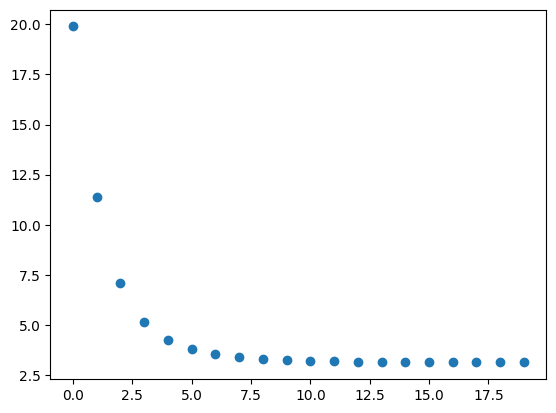

In [31]:
#plots the fs values over the given range
#x is the number of iterations
#y is the objective function value over time
xs = [x for x in range(len(fs))]
ys = [y for y in fs]
plt.scatter(xs,ys)